## Import necessary libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import ppscore as pps
from statistics import mode
plt.style.use('dark_background')
%matplotlib inline

## Load data in to pandas DataFrame

In [2]:
co2 = pd.read_csv('/Users/ahmedgaal/omdena-egypt-freshwater/src/data/Final Datasets/Climate related datasets/co2_data.csv')
meth = pd.read_csv('/Users/ahmedgaal/omdena-egypt-freshwater/src/data/Final Datasets/Climate related datasets/methane_data.csv')
nitr = pd.read_csv('/Users/ahmedgaal/omdena-egypt-freshwater/src/data/Final Datasets/Climate related datasets/nitrous_data.csv')

## Data Cleaning

#### Determine the most frequent year and normalize the data

In [3]:
data = [co2, meth, nitr]
for df in data:
    years = df['Year'].unique()
    print(set(list(df.columns)).difference(df.describe().columns))
    print(years)
    print()
print('Most frequent year is:  ', mode(years))

set()
[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018]

set()
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018]

set()
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018]

Most frequent year is:   1970


In [4]:
def normalize_data(data, year):
    """
    Utility method to normalize data to frequent year
    _____________________
    Params:
        data: list of dataframes
        year: int, most frequent year
    _____________________
    Returns:
        normalize all datasets
    """
    # Create empty list
    data_frame = []
    # instantiate a for statement to loop through the data
    for df in data:
        # slice the year in question
        new = df[df['Year'] >= year]
        # reset the index of the data and drop index column created
        new.reset_index(drop=True, inplace=True)
        # append data to our list
        data_frame.append(new)
    return data_frame

In [5]:
cc2, mtt2, ntt = normalize_data(data, 1970)

#### Drop duplicate columns

In [6]:
def drop_duplicates(data, col: str):
    """
    Utility method to drop duplicated columns
    _____________________
    Params:
        data: pandas DataFrame
        col: str, column(s) to be dropped
    _____________________
    Returns:
        Clean dataframes
    """
    # Create empty list to store cleaned dataframes
    dframe = []
    # Instantiate for statement to loop through the data
    for df in data:
        # drop the column using pandas drop method
        df.drop([col], axis=1, inplace=True)
        # append cleaned data to out empty list
        dframe.append(df)
    return dframe

drop_cols = [mtt2, ntt]
methane, nitrous = drop_duplicates(drop_cols, 'Year')

#### Join all cleaned datasets to reveal full dataframe

In [7]:
df = pd.concat([cc2, methane, nitrous], axis=1)

In [8]:
df.head()

,Year,CO2 emissions (kt),Methane emissions (kt of CO2 equivalent),Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
0,1970,21686.638,20777.6,7888.601
1,1971,23047.095,20622.6,7987.274
2,1972,25511.319,20403.8,8403.201
3,1973,23795.163,19836.8,8248.232
4,1974,26123.708,20781.7,8736.389


#### Change column names to more descriptive

In [9]:
df.rename(
    columns={
        'CO2 emissions (kt)': 'CO2_emissions',
        'Methane emissions (kt of CO2 equivalent)': 'Methane_emissions',
        'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)': 'NO2_emissions'
    }, inplace=True
)

In [10]:
df.head()

,Year,CO2_emissions,Methane_emissions,NO2_emissions
0,1970,21686.638,20777.6,7888.601
1,1971,23047.095,20622.6,7987.274
2,1972,25511.319,20403.8,8403.201
3,1973,23795.163,19836.8,8248.232
4,1974,26123.708,20781.7,8736.389


## Preliminary exploratory data analysis

#### Check memory the data is consuming

In [11]:
pd.DataFrame(
    df.memory_usage(deep=True),
    columns=['Memory']
)

,Memory
Index,128
Year,392
CO2_emissions,392
Methane_emissions,392
NO2_emissions,392


#### Print out extra information on the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               49 non-null     int64  
 1   CO2_emissions      49 non-null     float64
 2   Methane_emissions  49 non-null     float64
 3   NO2_emissions      49 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.7 KB


#### Compute descriptive statistics

In [13]:
df.describe()

,Year,CO2_emissions,Methane_emissions,NO2_emissions
count,49.00000,49.000000,49.000000,49.000000
mean,1994.00000,110641.926714,36890.914286,17140.396429
std,14.28869,68879.769464,14575.744345,4832.383747
min,1970.00000,21686.638000,19836.800000,7888.601000
25%,1982.00000,56523.138000,21802.000000,15590.000000
50%,1994.00000,91870.000000,34550.000000,17876.646000
75%,2006.00000,169130.000000,52150.000000,21270.000000
max,2018.00000,246260.000000,56870.000000,23650.000000


In [14]:
def pair_plot(data):
    """
    Utility method to plot pairwise relationships in dataset
    
    ________________________
    Params:
        data: pandas DataFrame, dataset in question
    ________________________
    Returns:
        None: a matplotlib plot
    """
    # Setting figure size
    plt.figure(figsize=(20, 15))
    # Using seaborn's pairplot method
    sb.pairplot(data)
    # Visualize data on plot
    plt.show()
    pass

<Figure size 1440x1080 with 0 Axes>

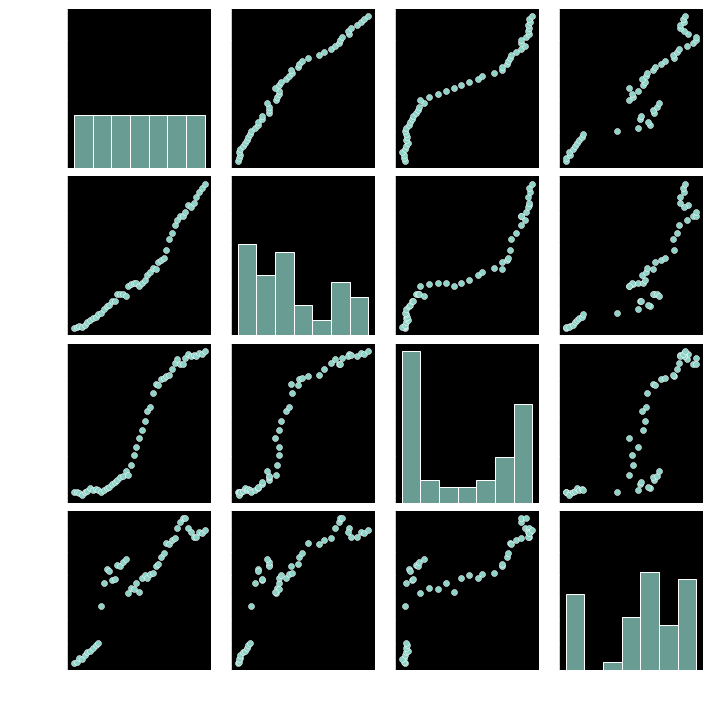

In [15]:
pair_plot(df)

### Correlation

#### Compute pairwise Correlation

In [16]:
def corr_heatmap(df, mask: bool):
    """Method to visualize correlation."""
    plt.figure(figsize=(24, 8))
    plt.title('Pairwise Correlation Matrix')
    if mask is True:
        # Create mask
        mask = np.zeros_like(df.corr(), dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True
        # Generate the heatmap
        sb.heatmap(df.corr(), annot=True, cmap='cividis', linewidth=.5,
                   mask=mask)
    else:
        sb.heatmap(df.corr(), annot=True, cmap='cividis')
    return plt.show()

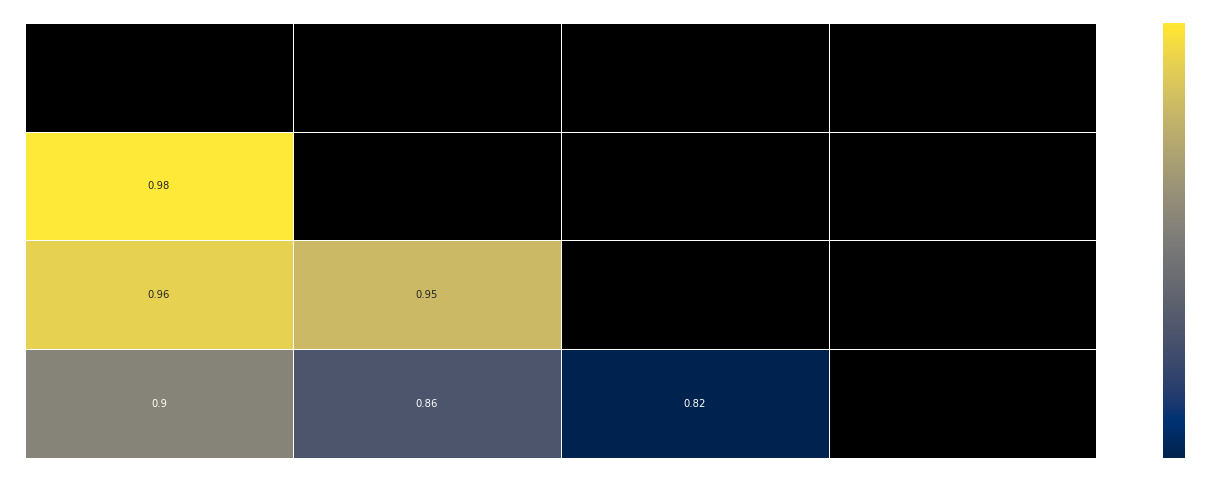

In [17]:
corr_heatmap(df, mask=True)

#### Compute predictive power score

In [18]:
def pps_heatmap(df):
  
    """
        Function for calculating the Predictive Power Score and plotting a heatmap
            Args:
                Pandas DataFrame or Series object
            __________
            Returns:
                figure
    """
    pps_mtrx = pps.matrix(df)
    pps_mtrx1 = pps_mtrx[['x', 'y', 'ppscore']].pivot(columns='x', index='y',
                                              values='ppscore')
    plt.figure(figsize = (24, 8))
    ax = sb.heatmap(pps_mtrx1, vmin=0, vmax=1, cmap="afmhot_r", linewidths=0.5,
                    annot=True)
    ax.set_title("Predictive Power Score Matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

<AxesSubplot:title={'center':'Predictive Power Score Matrix'}, xlabel='feature', ylabel='target'>

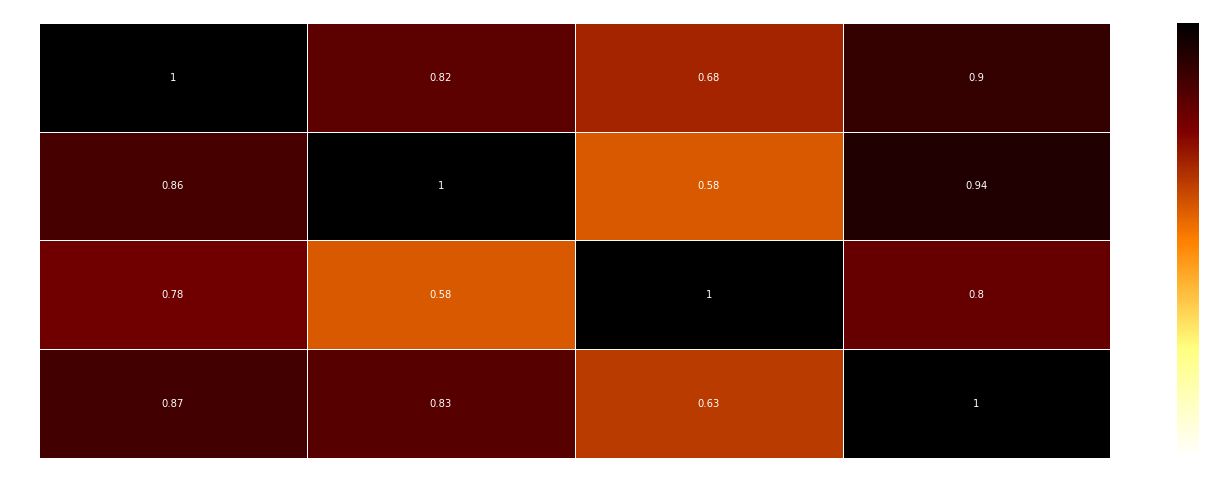

In [19]:
pps_heatmap(df)

## Visualize the data

In [20]:
def plot_data(data):
    """
    Utility method to plot data on a bar chart.
    
    ________________________
    Params:
        data: pandas DataFrame, dataset in question
    ________________________
    Returns
        None: Matplotlib plot
    """
    # List all numerical columns
    cols = list(data.describe().columns)
    
    # Initialize a for loop to plot all features in the data
    for col in cols:
        # Set size of the plot
        plt.figure(figsize=(15, 9))
        # Plot data on a bar chart
        sb.barplot(x=str(col), y='Year', data=data, orient='h')
        # Setting the title for the figure
        plt.title('Total  ' + str(col) + '  from 1970-2020 in Egypt')
        # Visualize the data
        plt.show()
    pass

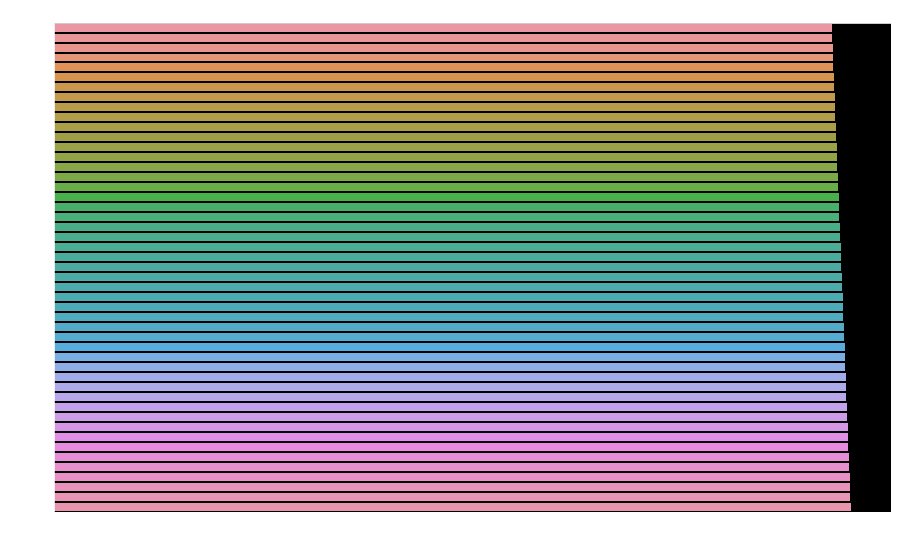

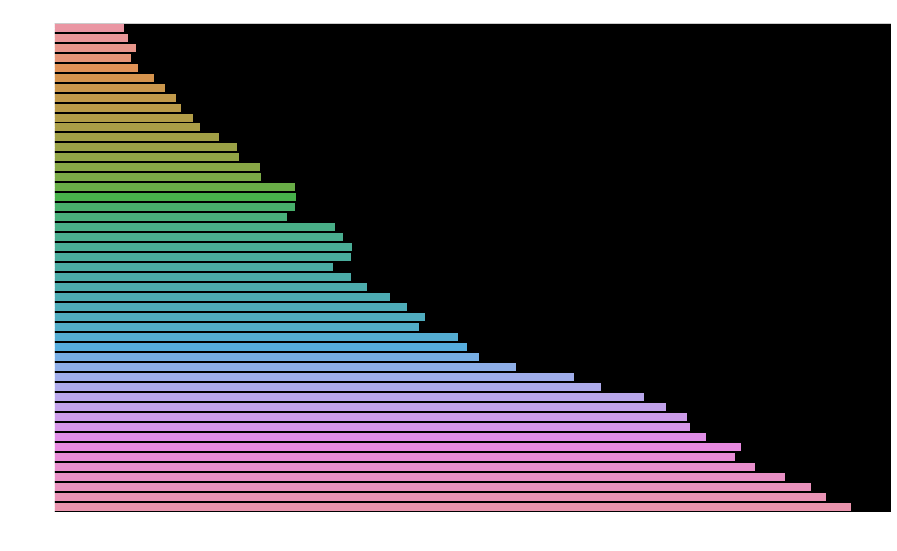

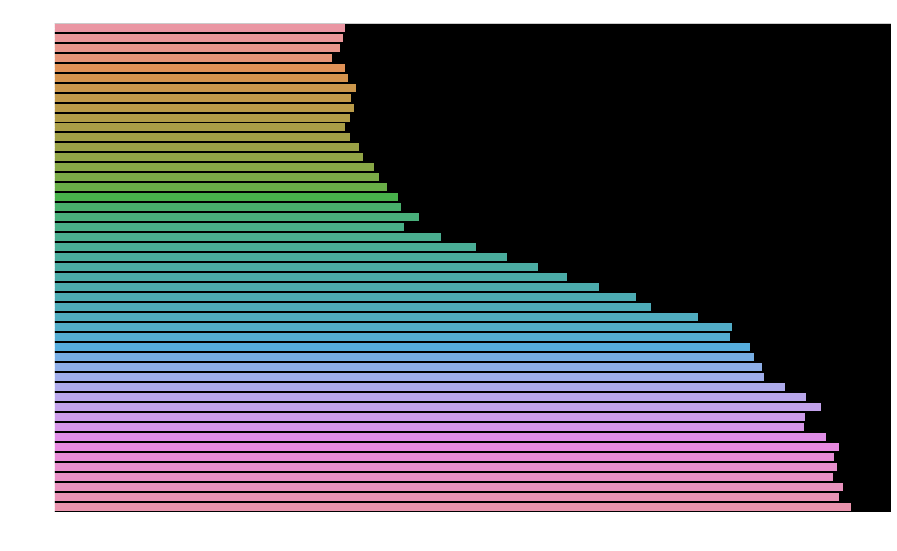

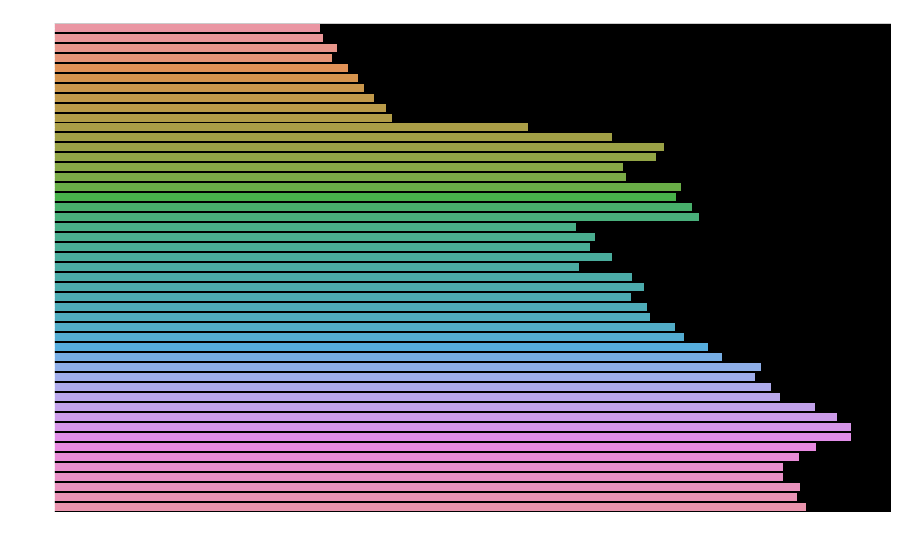

In [21]:
plot_data(df)

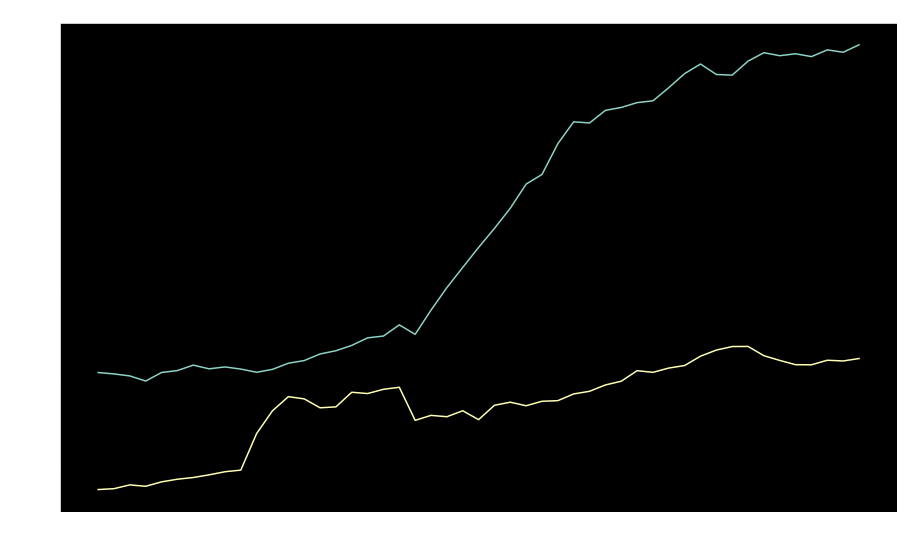

In [22]:
plt.figure(figsize=(15, 9))
sb.lineplot(x='Year', y='Methane_emissions', data=df)
sb.lineplot(x='Year', y='NO2_emissions', data=df)
plt.xlabel('Year')
plt.ylabel('Emissions in Kilotons')
plt.title('Methane and Nitrous Oxide emissions (Kilotons of CO2 equivalent) from 1970 to 2018')
plt.show()

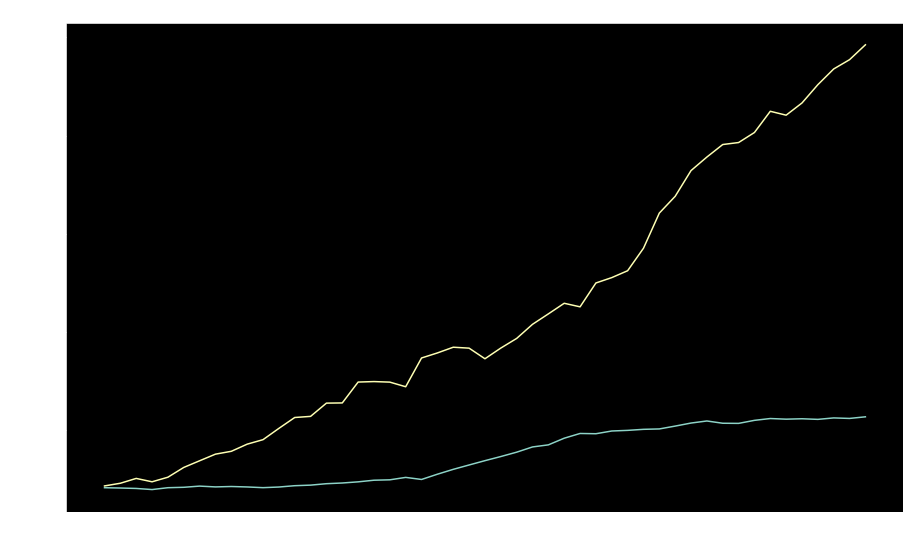

In [23]:
plt.figure(figsize=(15, 9))
sb.lineplot(x='Year', y='Methane_emissions', data=df)
sb.lineplot(x='Year', y='CO2_emissions', data=df)
plt.xlabel('Year')
plt.ylabel('Emissions in Kilotons')
plt.title('Methane and Carbon DiOxide emissions (Kilotons) from 1970 to 2018')
plt.show()

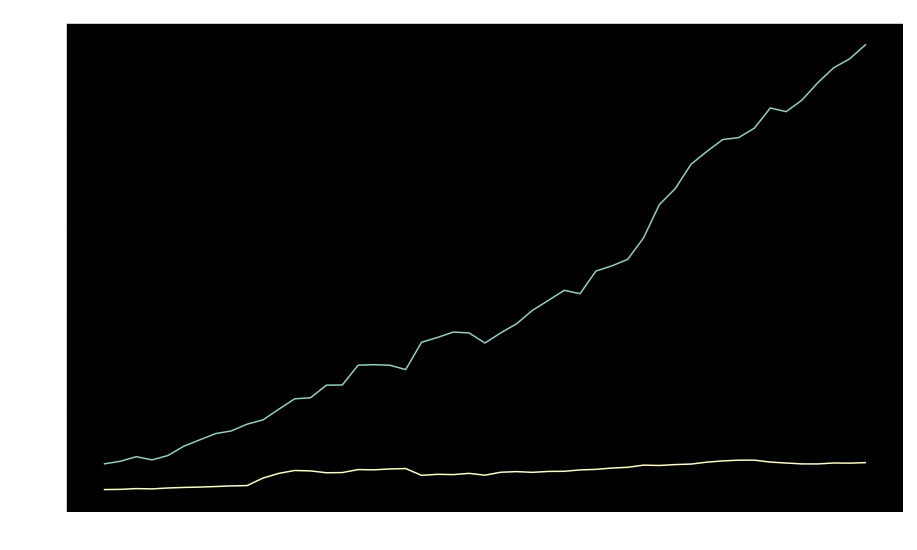

In [24]:
plt.figure(figsize=(15, 9))
sb.lineplot(x='Year', y='CO2_emissions', data=df)
sb.lineplot(x='Year', y='NO2_emissions', data=df)
plt.xlabel('Year')
plt.ylabel('Emissions in Kilotons')
plt.title('Carbon DiOxide and Nitrous Oxide emissions (Kilotons) from 1970 to 2018')
plt.show()

In [25]:
def pct_change(df, freq: int):
    new = df[df['Year'] >= freq]
    new_df = pd.DataFrame(
        new.pct_change().mean()
    ).T.drop(['Year'], axis=1)
    return new_df

In [26]:
last_decade = pct_change(df, freq=2008)
last_decade

,CO2_emissions,Methane_emissions,NO2_emissions
0,0.026897,0.003901,-0.000921


<Figure size 1080x648 with 0 Axes>

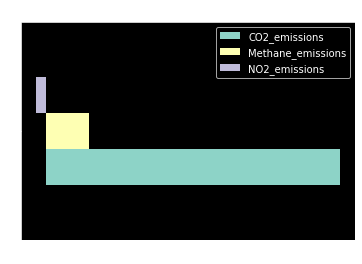

In [27]:
plt.figure(figsize=(15, 9))
last_decade.plot(kind='barh')
plt.title('Percentage change in emissions from 2008 - 2018')
plt.legend(loc='best')
plt.show()

In [28]:
pct_change(df, freq=2000)

,CO2_emissions,Methane_emissions,NO2_emissions
0,0.044833,0.009112,0.011032


##### From the visualization we can clearly see that **carbon dioxide emissions** in Egypt has been on constant increase of **2.7 %** in the last decade. We can also observe a **0.9 %** increase in **Methane Emissions** from the start of the 21st century. We can observer a rapid spike in **nitrous oxide emissions** from 1980 to 1990 in Egypt.

##### To conclude we can observe that there has been a constant increase in **carbon dioxide emissions** in Egypt